In [ ]:
"""
Script didático de EDA (Análise Exploratória de Dados) para o dataset do Google Places (restaurantes).

O QUE ESTE ARQUIVO FAZ:
1) Carrega o JSON com os dados.
2) Mostra shape (linhas x colunas), dtypes e primeiras linhas (head).
3) Calcula estatísticas descritivas (.describe()) nas colunas numéricas.
4) Faz contagem de valores (.value_counts()) em colunas categóricas (ex.: categoryName, city).
5) Detecta outliers com o método IQR (Interquartile Range) em colunas numéricas (ex.: reviewsCount, totalScore).
6) Gera visualizações com SEABORN e também com MATPLOTLIB (histogramas, boxplots e scatterplots).

"""

# Importa a biblioteca padrão do sistema operacional para checar se o arquivo existe.
import os  # 'os' dá funções do sistema operacional, como checar existência de arquivo/caminho

# Importa a biblioteca pandas, fundamental para manipulação de dados em formato de tabela (DataFrame).
import pandas as pd  # 'pd' é o apelido (alias) padrão usado para pandas

# Importa matplotlib.pyplot, que é a base de gráficos do matplotlib (gráficos clássicos em Python).
import matplotlib.pyplot as plt  # 'plt' é o alias padrão do matplotlib.pyplot

# Importa seaborn, que é uma camada acima do matplotlib, com gráficos estatísticos mais fáceis e bonitos.
import seaborn as sns  # 'sns' é o alias padrão do seaborn

# 1) CONFIGURAÇÕES INICIAIS

# Define o caminho do arquivo de dados JSON. Ajuste se o arquivo estiver em outro lugar.

FILE_PATH = r"C:\Users\Willgnner\Documents\Raspagem_Dados\dataset_crawler-google-places_2025-11-10_12-46-55-562.json"

# Define um número padrão de "top N" categorias para exibir em gráficos de barras (para não poluir com muitas categorias).
TOP_N_CATEGORIAS = 15  # você pode aumentar/diminuir conforme preferir

# Configura um estilo do seaborn para os gráficos (apenas melhora a estética; não é obrigatório).
sns.set_theme(style="whitegrid")  # 'whitegrid' adiciona um grid leve, bom para leitura

In [ ]:
# 2) CHECAGEM BÁSICA DO ARQUIVO E LEITURA

# Verifica se o arquivo existe no caminho especificado. Isso evita se o caminho estiver errado.
if not os.path.exists(FILE_PATH):
    # Se não existir, imprime uma mensagem clara do que fazer.
    raise FileNotFoundError( # exceção
        f"Arquivo não encontrado em: {FILE_PATH}\n"
        f"-> Ajuste a variável FILE_PATH no topo do script para o caminho correto do seu JSON."
    )

# Lê o arquivo JSON como um DataFrame do pandas.
# - orient='records' indica que o JSON está no formato "lista de objetos", cada objeto é uma linha.
# - Se o JSON fosse NDJSON (um JSON por linha), teríamos que usar 'lines=True'; aqui NÃO é o caso.

df = pd.read_json(FILE_PATH, orient="records")

# Mostra as 5 primeiras linhas para uma pré-visualização rápida (garante que os dados foram lidos corretamente).
print("\n=== PRÉ-VISUALIZAÇÃO: df.head() ===")
print(df.head())

# Mostra o formato (n_linhas, n_colunas) do DataFrame para sabermos o tamanho da base.
print("\n=== FORMATO DO DATAFRAME: df.shape ===")
print(df.shape)

# Mostra os tipos de dados de cada coluna (int, float, object, bool, etc.) para sabermos o que é numérico/categórico.
print("\n=== TIPOS DE DADOS: df.dtypes ===")
print(df.dtypes)


=== PRÉ-VISUALIZAÇÃO: df.head() ===
                                              title  totalScore  reviewsCount  \
0                          Restaurante Mistura Fina         4.4           227   
1                                 Restaurante Árabe         4.6          2187   
2  Restaurante Gratidão - Restaurante comida por Kg         4.9           788   
3                                Galpão Restaurante         4.7           498   
4                          Restaurante Sabor D Casa         4.6           883   

                                street     city  state countryCode  \
0                               R. 239  Goiânia  Goiás          BR   
1                      Avenida 83, 205  Goiânia  Goiás          BR   
2  Av. Paranaíba, 715 - Qd. 90, Lt. 86  Goiânia  Goiás          BR   
3                  R. 83, s/n - Sala 2  Goiânia  Goiás          BR   
4                           R. 24, 418  Goiânia  Goiás          BR   

               phone              categoryName  \
0   +

In [ ]:
# 3) SELEÇÃO DE COLUNAS NUMÉRICAS E CATEGÓRICAS (USO DIDÁTICO)

# Seleciona automaticamente quais colunas são numéricas.
# - select_dtypes(...) filtra colunas pelo tipo (dtype) no pandas.
# - include="number" é um atalho que significa "todos os subtipos numéricos do NumPy"
#   (ex.: int16/32/64, float16/32/64, complex — bool NÃO entra aqui).
# - O resultado é um DataFrame contendo só as colunas numéricas.
# - .columns retorna o Index com os NOMES das colunas desse DataFrame filtrado.
# - .tolist() converte esse Index para uma lista Python comum (list[str]), fácil de imprimir/iterar.
colunas_numericas = df.select_dtypes(include="number").columns.tolist()

# Seleciona automaticamente quais colunas são NÃO numéricas.
# - exclude="number" faz o oposto: descarta todas as colunas numéricas e mantém o resto.
# - Nesse "resto" normalmente entram: object (strings/texto), bool, category, datetime64[ns], timedelta64[ns] etc.
# - Assim como acima, .columns pega os nomes das colunas, e .tolist() vira uma lista Python.
colunas_categoricas = df.select_dtypes(exclude="number").columns.tolist()

# Imprime um título com quebra de linha antes para legibilidade no terminal.
print("\n=== COLUNAS NUMÉRICAS ===")
# Mostra a lista de nomes de colunas numéricas (ex.: ['totalScore', 'reviewsCount']).
print(colunas_numericas)

# Imprime outro título com quebra de linha para separar os blocos na saída.
print("\n=== COLUNAS CATEGÓRICAS ===")
# Mostra a lista de nomes de colunas não numéricas (ex.: ['title', 'city', 'categoryName', ...]).
print(colunas_categoricas)


=== COLUNAS NUMÉRICAS ===
['totalScore', 'reviewsCount']

=== COLUNAS CATEGÓRICAS ===
['title', 'street', 'city', 'state', 'countryCode', 'phone', 'categoryName', 'url', 'website']


In [ ]:
# 4) ESTATÍSTICAS DESCRITIVAS NAS COLUNAS NUMÉRICAS

# Seleciona automaticamente quais colunas são numéricas.
# - select_dtypes(...) filtra colunas pelo tipo (dtype) no pandas.
# - include="number" é um atalho que significa "todos os subtipos numéricos do NumPy"
#   (ex.: int16/32/64, float16/32/64, complex — bool NÃO entra aqui).
# - O resultado é um DataFrame contendo só as colunas numéricas.
# - .columns retorna o Index com os NOMES das colunas desse DataFrame filtrado.
# - .tolist() converte esse Index para uma lista Python comum (list[str]), fácil de imprimir/iterar.
colunas_numericas = df.select_dtypes(include="number").columns.tolist()

# Seleciona automaticamente quais colunas são NÃO numéricas.
# - exclude="number" faz o oposto: descarta todas as colunas numéricas e mantém o resto.
# - Nesse "resto" normalmente entram: object (strings/texto), bool, category, datetime64[ns], timedelta64[ns] etc.
# - Assim como acima, .columns pega os nomes das colunas, e .tolist() vira uma lista Python.
colunas_categoricas = df.select_dtypes(exclude="number").columns.tolist()

# Imprime um título com quebra de linha antes para legibilidade no terminal.
print("\n=== COLUNAS NUMÉRICAS ===")
# Mostra a lista de nomes de colunas numéricas (ex.: ['totalScore', 'reviewsCount']).
print(colunas_numericas)

# Imprime outro título com quebra de linha para separar os blocos na saída.
print("\n=== COLUNAS CATEGÓRICAS ===")
# Mostra a lista de nomes de colunas não numéricas (ex.: ['title', 'city', 'categoryName', ...]).
print(colunas_categoricas)


=== ESTATÍSTICAS DESCRITIVAS (.describe()) - NUMÉRICAS ===
       totalScore  reviewsCount
count   50.000000     50.000000
mean     4.436000    541.500000
std      0.294688   1228.879965
min      3.400000      1.000000
25%      4.300000     45.250000
50%      4.400000    190.500000
75%      4.600000    679.500000
max      5.000000   8316.000000

=== ESTATÍSTICAS DESCRITIVAS (.describe()) - NUMÉRICAS ===
                           title  street     city  state countryCode  \
count                         50      50       50     50          50   
unique                        50      50        1      2           1   
top     Restaurante Mistura Fina  R. 239  Goiânia  Goiás          BR   
freq                           1       1       50     45          50   

                   phone categoryName  \
count                 44           50   
unique                44            8   
top     +55 62 3432-5508  Restaurante   
freq                   1           28   

                         

In [ ]:
# 5) CONTAGEM DE VALORES (.value_counts) EM ALGUMAS COLUNAS

# Define uma lista vazia que vai guardar os nomes de colunas que queremos contar.
colunas_para_contagem = []

# Verifica se existe a coluna "categoryName" no DataFrame (df.columns é o conjunto de nomes de colunas).
# Se existir, adiciona "categoryName" à lista colunas_para_contagem.
if "categoryName" in df.columns:
    colunas_para_contagem.append("categoryName")

# Faz a mesma verificação para a coluna "city"; se existir, adiciona à lista.
if "city" in df.columns:
    colunas_para_contagem.append("city")

# Percorre cada nome de coluna que ficou na lista colunas_para_contagem.
for col in colunas_para_contagem:
    # Aplica .value_counts() para contar quantas vezes cada categoria aparece na coluna atual (col).
    # O argumento dropna=False inclui também os valores ausentes (NaN) na contagem.
    # O retorno é uma Series: o índice (index) são as categorias e os valores são as frequências.
    vc = df[col].value_counts(dropna=False)

    # Imprime um cabeçalho identificando de qual coluna é a contagem (usa f-string para inserir {col} no texto).
    print(f"\n=== VALUE_COUNTS: {col} ===")

    # Imprime a Series de frequências (categorias no índice e contagens como valores).
    print(vc)

    # Converte a Series (vc) para DataFrame para facilitar exportação/plot posterior.
    # .reset_index() transforma o índice (categorias) em uma coluna normal chamada "index" por padrão.
    vc_df = vc.reset_index()

    # Renomeia as colunas do DataFrame recém-criado:
    # - a primeira coluna (antigo índice) vira o nome da coluna original (col),
    # - a segunda coluna passa a se chamar "frequencia" (quantidade de ocorrências).
    vc_df.columns = [col, "frequencia"]


=== VALUE_COUNTS: categoryName ===
categoryName
Restaurante                 28
Restaurante self-service    11
Restaurante brasileiro       4
Lanchonete                   3
Empório gourmet              1
Restaurante italiano         1
Restaurante Mineiro          1
Restaurante fast-food        1
Name: count, dtype: int64

=== VALUE_COUNTS: city ===
city
Goiânia    50
Name: count, dtype: int64


In [ ]:
# 6) DETECÇÃO SIMPLES DE OUTLIERS PELO MÉTODO IQR

# Função didática para detectar outliers em UMA série numérica usando o método IQR.
# - Q1 = 25º percentil; Q3 = 75º percentil; IQR = Q3 - Q1.
# - Regra clássica: outlier se valor < (Q1 - 1.5*IQR) OU valor > (Q3 + 1.5*IQR).
def detectar_outliers_iqr(serie):
    # Converte a série para numérico:
    # - pd.to_numeric tenta transformar cada valor em número (float);
    # - errors="coerce" faz com que valores não convertíveis virem NaN (evita erro de tipo).
    serie_num = pd.to_numeric(serie, errors="coerce")

    # Calcula o primeiro quartil (25%) ignorando NaNs por padrão.
    Q1 = serie_num.quantile(0.25)

    # Calcula o terceiro quartil (75%) ignorando NaNs por padrão.
    Q3 = serie_num.quantile(0.75)

    # Intervalo Interquartil: mede a "largura" do meio da distribuição (Q3 - Q1).
    IQR = Q3 - Q1

    # Limite inferior para marcar outliers (abaixo deste valor é considerado extremo inferior).
    lim_inf = Q1 - 1.5 * IQR

    # Limite superior para marcar outliers (acima deste valor é considerado extremo superior).
    lim_sup = Q3 + 1.5 * IQR

    # Cria uma série booleana (True/False) indicando se cada valor é outlier:
    # - Comparações com NaN resultam em False, então NaNs não serão marcados como outlier aqui.
    mascara = (serie_num < lim_inf) | (serie_num > lim_sup)

    # Retorna um DataFrame com:
    # - "valor": a coluna numérica já convertida (com NaN onde não deu para converter);
    # - "e_outlier": True se caiu fora dos limites, False caso contrário;
    # - Colunas repetindo Q1, Q3, IQR e limites para referência (mesmo valor em todas as linhas).
    return pd.DataFrame({
        "valor": serie_num,
        "e_outlier": mascara,
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "limite_inferior": lim_inf,
        "limite_superior": lim_sup
    })



=== OUTLIERS via IQR em 'reviewsCount' ===
Total de outliers encontrados: 3
Exemplos de linhas marcadas como outlier:
    valor  e_outlier     Q1     Q3     IQR  limite_inferior  limite_superior
1    2187       True  45.25  679.5  634.25         -906.125         1630.875
8    1906       True  45.25  679.5  634.25         -906.125         1630.875
21   8316       True  45.25  679.5  634.25         -906.125         1630.875

=== OUTLIERS via IQR em 'totalScore' ===
Total de outliers encontrados: 1
Exemplos de linhas marcadas como outlier:
    valor  e_outlier   Q1   Q3  IQR  limite_inferior  limite_superior
13    3.4       True  4.3  4.6  0.3             3.85             5.05


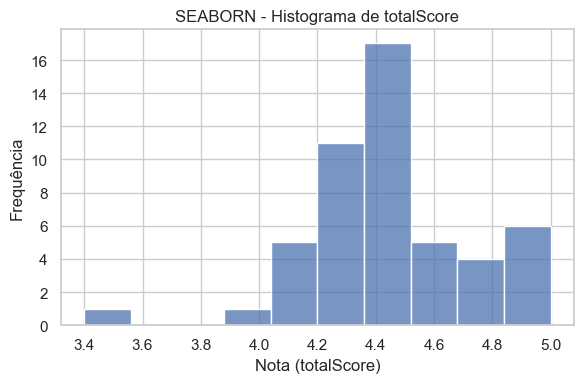

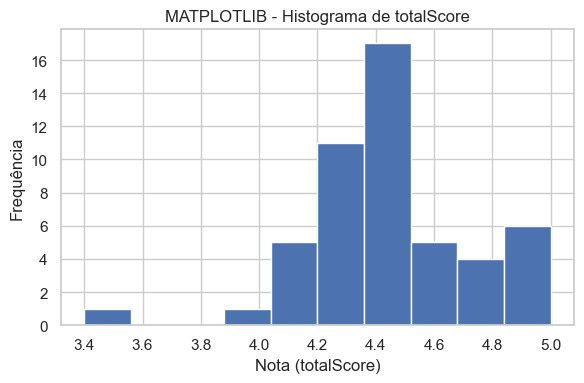

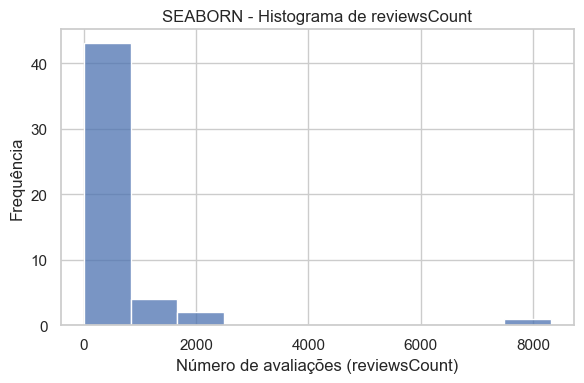

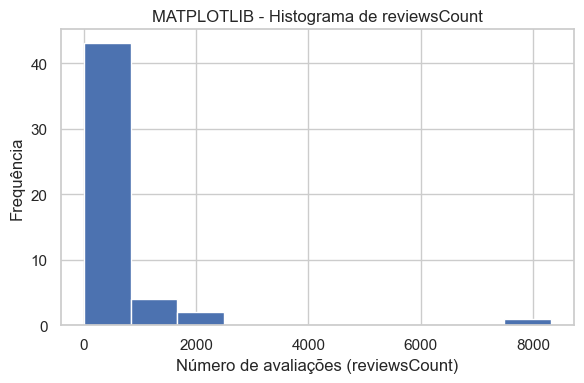

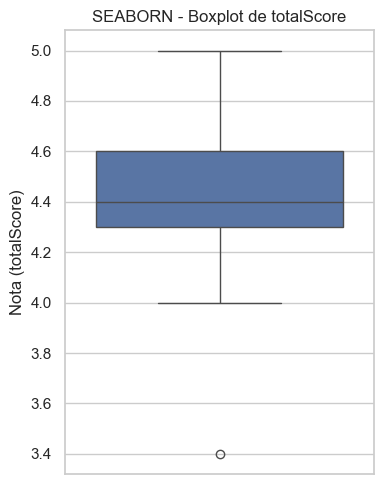

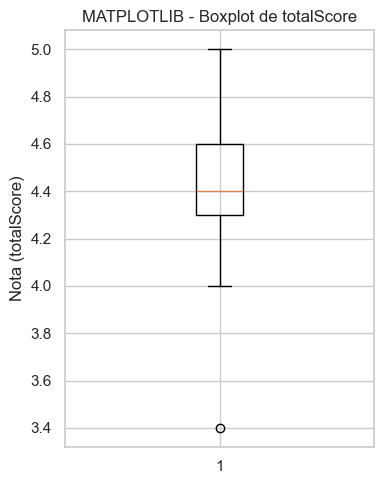

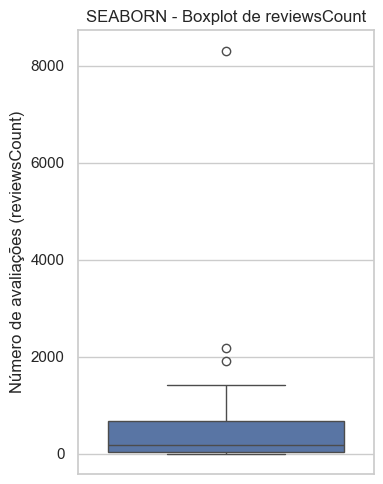

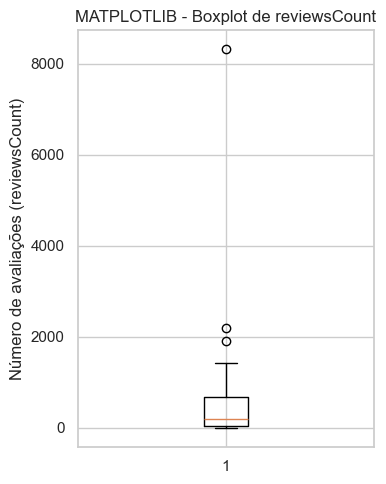

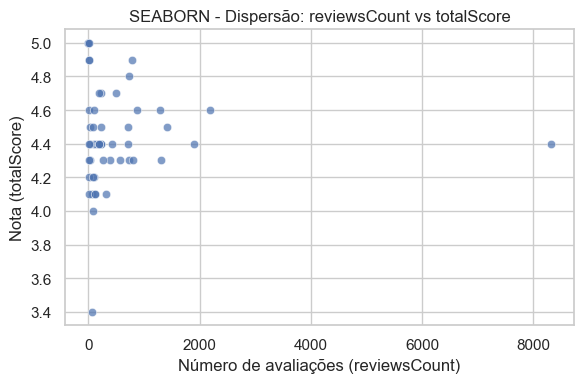

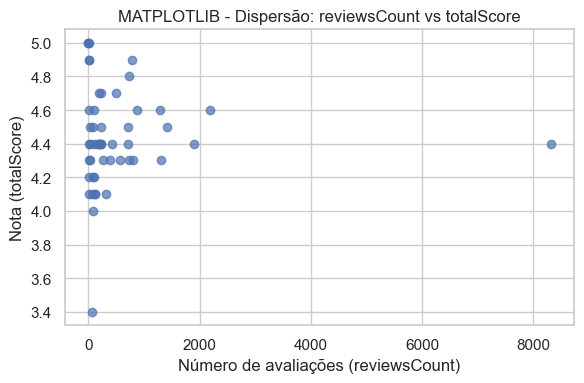

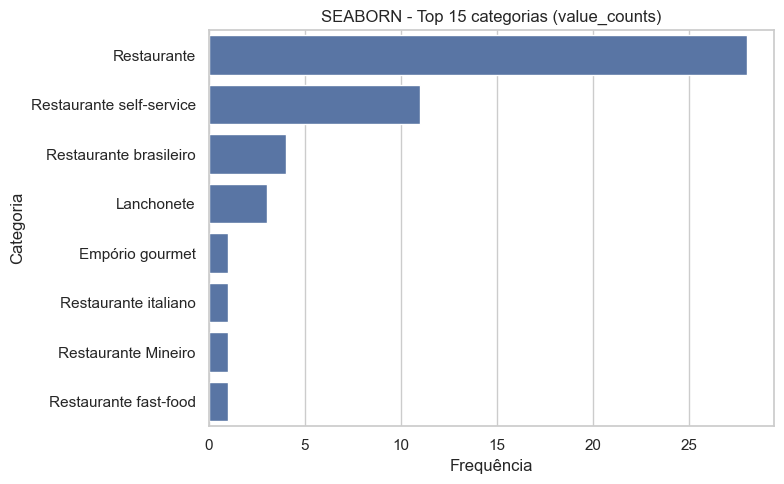

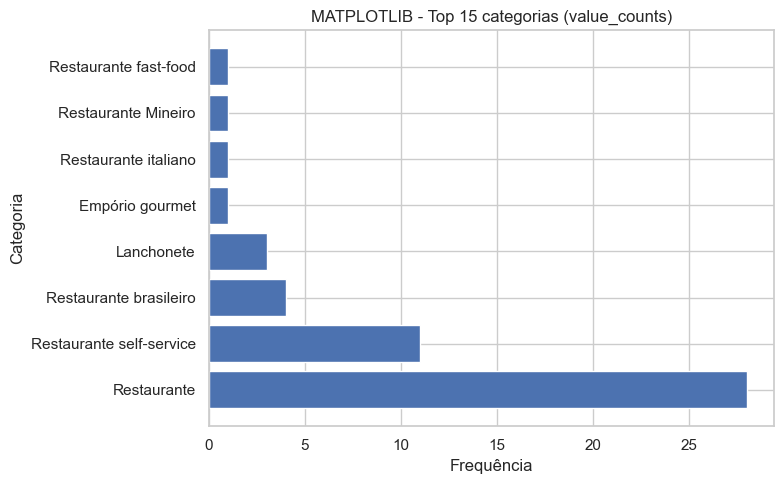

In [ ]:
# Escolhe colunas típicas para detectar outliers no seu dataset (ajuste se necessário).
# Normalmente, 'reviewsCount' e 'totalScore' existem e são numéricas.
colunas_para_outliers = [c for c in ["reviewsCount", "totalScore"] if c in df.columns]
# ^ List comprehension:
#   - percorre a lista ["reviewsCount", "totalScore"]
#   - mantém apenas 'c' que EXISTEM em df.columns (evita erro se a coluna não existir)
#   - resultado é uma lista com os nomes de colunas válidas para análise

# Para cada coluna selecionada, roda a detecção e imprime um resumo.
for col in colunas_para_outliers:
    # chama a função detectar_outliers_iqr (definida antes) passando a Série df[col]
    resultado_out = detectar_outliers_iqr(df[col])
    # soma os True da coluna booleana "e_outlier" para obter a quantidade total
    qtd_out = int(resultado_out["e_outlier"].sum())
    # imprime cabeçalho indicando em qual coluna estamos contando outliers (f-string injeta {col})
    print(f"\n=== OUTLIERS via IQR em '{col}' ===")
    # imprime o número total de outliers encontrados nessa coluna
    print(f"Total de outliers encontrados: {qtd_out}")
    # imprime um rótulo de seção
    print("Exemplos de linhas marcadas como outlier:")
    # filtra apenas linhas com e_outlier == True e mostra as 5 primeiras (head())
    print(resultado_out[resultado_out["e_outlier"]].head())


# 7) VISUALIZAÇÕES (SEABORN E MATPLOTLIB)

# OBS: para cada gráfico mostramos VERSÃO SEABORN e depois VERSÃO MATPLOTLIB.
#      Usamos 'totalScore' (nota) e 'reviewsCount' (nº de avaliações).

# -------- HISTOGRAMAS --------
# Se 'totalScore' existir, plota histograma.
if "totalScore" in df.columns:
    # (Seaborn) Histograma de totalScore
    plt.figure(figsize=(6, 4))                     # cria nova figura; figsize define largura x altura em polegadas
    sns.histplot(data=df, x="totalScore", bins=10) # histograma com 10 bins; seaborn lê a coluna 'totalScore' do DataFrame
    plt.title("SEABORN - Histograma de totalScore")# título do gráfico
    plt.xlabel("Nota (totalScore)")                # rótulo do eixo X
    plt.ylabel("Frequência")                       # rótulo do eixo Y
    plt.tight_layout()                             # ajusta espaçamento interno para evitar cortes de texto
    plt.show()                                     # renderiza o gráfico na tela

    # (Matplotlib) Histograma de totalScore
    plt.figure(figsize=(6, 4))                              # nova figura separada
    plt.hist(df["totalScore"].dropna(), bins=10)            # histograma puro; .dropna() remove NaN antes de plotar
    plt.title("MATPLOTLIB - Histograma de totalScore")      # título
    plt.xlabel("Nota (totalScore)")                         # rótulo X
    plt.ylabel("Frequência")                                # rótulo Y
    plt.tight_layout()                                      # ajusta espaçamento
    plt.show()                                              # mostra

# Se 'reviewsCount' existir, plota histograma.
if "reviewsCount" in df.columns:
    # (Seaborn) Histograma de reviewsCount
    plt.figure(figsize=(6, 4))                     # nova figura
    sns.histplot(data=df, x="reviewsCount", bins=10)# histograma; seaborn calcula frequências
    plt.title("SEABORN - Histograma de reviewsCount")
    plt.xlabel("Número de avaliações (reviewsCount)")
    plt.ylabel("Frequência")
    plt.tight_layout()
    plt.show()

    # (Matplotlib) Histograma de reviewsCount
    plt.figure(figsize=(6, 4))                                        # nova figura
    plt.hist(pd.to_numeric(df["reviewsCount"], errors="coerce").dropna(), bins=10)
    # ^ garante numérico com to_numeric(coerce) e remove NaN antes de plotar
    plt.title("MATPLOTLIB - Histograma de reviewsCount")
    plt.xlabel("Número de avaliações (reviewsCount)")
    plt.ylabel("Frequência")
    plt.tight_layout()
    plt.show()

# -------- BOXPLOTS --------
# Se 'totalScore' existir, plota boxplot.
if "totalScore" in df.columns:
    # (Seaborn) Boxplot de totalScore
    plt.figure(figsize=(4, 5))                                      # figura (um pouco mais alta)
    sns.boxplot(y=pd.to_numeric(df["totalScore"], errors="coerce")) # box de uma variável no eixo Y (vertical)
    plt.title("SEABORN - Boxplot de totalScore")
    plt.ylabel("Nota (totalScore)")
    plt.tight_layout()
    plt.show()

    # (Matplotlib) Boxplot de totalScore
    plt.figure(figsize=(4, 5))                                                    # nova figura
    plt.boxplot(pd.to_numeric(df["totalScore"], errors="coerce").dropna(), vert=True)
    # ^ plt.boxplot recebe um array/Series; vert=True para orientar verticalmente
    plt.title("MATPLOTLIB - Boxplot de totalScore")
    plt.ylabel("Nota (totalScore)")
    plt.tight_layout()
    plt.show()

# Se 'reviewsCount' existir, plota boxplot.
if "reviewsCount" in df.columns:
    # (Seaborn) Boxplot de reviewsCount
    plt.figure(figsize=(4, 5))                                        # nova figura
    sns.boxplot(y=pd.to_numeric(df["reviewsCount"], errors="coerce"))  # converte para numérico e plota
    plt.title("SEABORN - Boxplot de reviewsCount")
    plt.ylabel("Número de avaliações (reviewsCount)")
    plt.tight_layout()
    plt.show()

    # (Matplotlib) Boxplot de reviewsCount
    plt.figure(figsize=(4, 5))                                                    # nova figura
    plt.boxplot(pd.to_numeric(df["reviewsCount"], errors="coerce").dropna(), vert=True)
    plt.title("MATPLOTLIB - Boxplot de reviewsCount")
    plt.ylabel("Número de avaliações (reviewsCount)")
    plt.tight_layout()
    plt.show()

# -------- SCATTERPLOTS (dispersão) --------
# Só faz sentido se as duas colunas existirem: X = reviewsCount, Y = totalScore
if ("reviewsCount" in df.columns) and ("totalScore" in df.columns):
    # (Seaborn) Dispersão entre reviewsCount (x) e totalScore (y)
    plt.figure(figsize=(6, 4))                                       # nova figura
    sns.scatterplot(
        x=pd.to_numeric(df["reviewsCount"], errors="coerce"),        # eixo X: garante numérico (NaN se não converter)
        y=pd.to_numeric(df["totalScore"], errors="coerce"),          # eixo Y: idem
        alpha=0.7                                                    # transparência (0=totalmente transparente, 1=opaco)
    )
    plt.title("SEABORN - Dispersão: reviewsCount vs totalScore")
    plt.xlabel("Número de avaliações (reviewsCount)")
    plt.ylabel("Nota (totalScore)")
    plt.tight_layout()
    plt.show()

    # (Matplotlib) Dispersão entre reviewsCount (x) e totalScore (y)
    plt.figure(figsize=(6, 4))                                       # nova figura
    plt.scatter(
        pd.to_numeric(df["reviewsCount"], errors="coerce"),          # X: valores numéricos/NaN
        pd.to_numeric(df["totalScore"], errors="coerce"),            # Y: valores numéricos/NaN
        alpha=0.7                                                    # mesma transparência para facilitar leitura
    )
    plt.title("MATPLOTLIB - Dispersão: reviewsCount vs totalScore")
    plt.xlabel("Número de avaliações (reviewsCount)")
    plt.ylabel("Nota (totalScore)")
    plt.tight_layout()
    plt.show()

# -------- BÔNUS: BARRAS PARA AS CATEGORIAS (value_counts visual) --------
# Se 'categoryName' existir, mostra as TOP_N categorias em gráfico de barras (seaborn + matplotlib).
if "categoryName" in df.columns:
    # Calcula a contagem por categoria e pega apenas as TOP_N (evita gráfico poluído com muitas categorias raras).
    vc_cat = df["categoryName"].value_counts().head(TOP_N_CATEGORIAS)  # retorna Series (index=categoria, value=frequência)

    # (Seaborn) Barras das top categorias
    plt.figure(figsize=(8, 5))                         # figura mais larga, pois são várias categorias
    sns.barplot(x=vc_cat.values, y=vc_cat.index)       # x: frequências; y: nomes (index da Series)
    plt.title(f"SEABORN - Top {TOP_N_CATEGORIAS} categorias (value_counts)")
    plt.xlabel("Frequência")
    plt.ylabel("Categoria")
    plt.tight_layout()
    plt.show()

    # (Matplotlib) Barras das top categorias
    plt.figure(figsize=(8, 5))                         # nova figura
    plt.barh(vc_cat.index, vc_cat.values)              # barh = barras horizontais (texto no eixo Y fica mais legível)
    plt.title(f"MATPLOTLIB - Top {TOP_N_CATEGORIAS} categorias (value_counts)")
    plt.xlabel("Frequência")
    plt.ylabel("Categoria")
    plt.tight_layout()
    plt.show()

In [ ]:
# 8) MENSAGEM FINAL (IMPORTÂNCIA)

# Imprime, no final, um mini-resumo da importância da EDA antes da modelagem.
print("\n=== RESUMO DIDÁTICO (IMPORTÂNCIA DA EDA) ===")
print("- .describe(): mostra média, desvio padrão, mínimos, quartis e máximos das variáveis numéricas.")
print("- .value_counts(): revela as categorias mais frequentes e possíveis desbalanceamentos.")
print("- Outliers (IQR): ajudam a identificar valores extremos que podem distorcer modelos e métricas.")
print("- Histogramas: mostram a distribuição (assimetria, caudas, multimodalidade).")
print("- Boxplots: resumem mediana, dispersão e outliers rapidamente.")
print("- Scatterplots: sugerem relações entre variáveis (ex.: mais avaliações -> nota maior?).")
print("- Fazer EDA ANTES da modelagem evita surpresas, orienta limpeza/tratamentos e escolhas de modelos.")


=== RESUMO DIDÁTICO (IMPORTÂNCIA DA EDA) ===
- .describe(): mostra média, desvio padrão, mínimos, quartis e máximos das variáveis numéricas.
- .value_counts(): revela as categorias mais frequentes e possíveis desbalanceamentos.
- Outliers (IQR): ajudam a identificar valores extremos que podem distorcer modelos e métricas.
- Histogramas: mostram a distribuição (assimetria, caudas, multimodalidade).
- Boxplots: resumem mediana, dispersão e outliers rapidamente.
- Scatterplots: sugerem relações entre variáveis (ex.: mais avaliações -> nota maior?).
- Fazer EDA ANTES da modelagem evita surpresas, orienta limpeza/tratamentos e escolhas de modelos.
